## Retrievability analysis


In [1]:
import pandas as pd
import numpy as np
from utils.general import (aggregate_results, merge_with_model_details)
%load_ext autoreload

directory = "metric_results"
filename = "metrics_retriev"
filetype = ".csv"

# Load data
df = aggregate_results(directory, filename, filetype)
# # Default seed for first runs
df["seed"] = df["seed"].fillna(1234)
df["dataset"] = df["dataset"].str.replace("CQADupstackEnglishRetrieval", "DupstackEnglish")
df["type"] = df["type"].map({"top": "High", "bottom": "Low"})

# Get largest sample experiment
df = merge_with_model_details(df, "config/model_details.yaml")
assert df.architecture.isna().sum() == 0 

# Handling nans
df = df.reset_index(drop=True)
nan_cols = ~(df.isna().sum() == df.shape[0])
print(f"Dropping values {nan_cols[nan_cols == False].index}")
df = df.loc[:, ~(df.isna().sum() == df.shape[0])]
print(df.shape)

2026-01-22 08:43:26.828602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769067806.846038 1335096 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769067806.851394 1335096 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769067806.866028 1335096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769067806.866048 1335096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769067806.866050 1335096 computation_placer.cc:177] computation placer alr

Loaded dataframe with shape:  (220600, 32)
Dropping values Index(['ph_dim_euclidean', 'ph_dim_cosine'], dtype='object')
(220600, 44)


## Retrievability prediction baseline

Here we get the embeddings for each dataset and model and compute a baseline for predicting retrievability from raw embeddings. Note that this can take quite some time, due to the large amount of data being loaded.

In [2]:
import os
from utils.general import load_embeddings
from dotenv import load_dotenv
load_dotenv()

# Get embeddings
df_2025 = df[df["seed"] == 2025]

# Make dir
os.makedirs("document_vecs/", exist_ok=True)

for dataset in df_2025["dataset"].unique():
    for model in df_2025["model"].unique():
        try:
            cached_name = f"cache_{model.replace('/', '_')}"
            data, results = load_embeddings(cached_name, dataset)
            subset = df_2025[(df_2025["model"] == model) & (df_2025["dataset"] == dataset)]
        
            vecs = np.vstack(subset["text"].apply(lambda x: np.array(data.get_vector(x))).values)
            np.save(f"document_vecs/vecs_{model.replace('/', '_')}_{dataset}.npy", vecs)
        except Exception as e:
            print(f"Failed for model {model} and dataset {dataset}")
            print(e)

Loading embeddings for model:  cache_Alibaba-NLP_gte-Qwen2-1.5B-instruct  and task:  ArguAna
Looking for files at:  results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct
[('results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct', ['c6c1b92f4a3e1b92b326ad29dd3c8433457df8dd'], []), ('results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct/c6c1b92f4a3e1b92b326ad29dd3c8433457df8dd', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Loading embeddings for model:  cache_Alibaba-NLP_gte-Qwen2-7B-instruct  and task:  ArguAna
Looking for files at:  results/Alibaba-NLP/gte-Qwen2-7B-instruct/Alibaba-NLP__gte-Qwen2-7B-instruct
[('results/Alibaba-NLP/gte-Qwen2-7B-instruct/Alibaba-NLP__gte-Qwen2-7B-instruct', ['e26182b2122f4435e8b3ebec

Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.


Looking for files at:  results/thenlper/gte-small/thenlper__gte-small
[('results/thenlper/gte-small/thenlper__gte-small', ['17e1f347d17fe144873b1201da91788898c639cd'], []), ('results/thenlper/gte-small/thenlper__gte-small/17e1f347d17fe144873b1201da91788898c639cd', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Loading embeddings for model:  cache_Alibaba-NLP_gte-Qwen2-1.5B-instruct  and task:  DupstackEnglish
Looking for files at:  results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct
[('results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct', ['c6c1b92f4a3e1b92b326ad29dd3c8433457df8dd'], []), ('results/Alibaba-NLP/gte-Qwen2-1.5B-instruct/Alibaba-NLP__gte-Qwen2-1.5B-instruct/c6c1b92f4a3e1b92b326ad29dd3c8433457df8dd', [], ['ArguAna.json', 'CQAD

No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No exi

Looking for files at:  results/BAAI/bge-small-en-v1.5/BAAI__bge-small-en-v1.5
[('results/BAAI/bge-small-en-v1.5/BAAI__bge-small-en-v1.5', ['5c38ec7c405ec4b44b94cc5a9bb96e735b38267a'], []), ('results/BAAI/bge-small-en-v1.5/BAAI__bge-small-en-v1.5/5c38ec7c405ec4b44b94cc5a9bb96e735b38267a', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'NanoDBPediaRetrieval.json', 'NanoFEVERRetrieval.json', 'NanoFiQA2018Retrieval.json', 'NanoMSMARCORetrieval.json', 'NanoQuoraRetrieval.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Results file not found for DupstackEnglish and cache_BAAI_bge-small-en-v1.5.
Failed for model BAAI/bge-small-en-v1.5 and dataset DupstackEnglish
'NoneType' object has no attribute 'get_vector'
Loading embeddings for model:  cache_Qwen_Qwen3-Embedding-0.6B  and task:  DupstackEnglish
Looking for files at:  results/Qwen/Qwen3-Em

Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).
Dimension file not found. Vector dimension remains uninitialized.
No existing files found. Initialized empty TextVectorMap (DupstackEnglish).


Failed for model sentence-transformers/msmarco-roberta-base-ance-firstp and dataset DupstackEnglish
'NoneType' object has no attribute 'get_vector'
Loading embeddings for model:  cache_thenlper_gte-base  and task:  DupstackEnglish
Looking for files at:  results/thenlper/gte-base/thenlper__gte-base
[('results/thenlper/gte-base/thenlper__gte-base', ['c078288308d8dee004ab72c6191778064285ec0c'], []), ('results/thenlper/gte-base/thenlper__gte-base/c078288308d8dee004ab72c6191778064285ec0c', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'NanoDBPediaRetrieval.json', 'NanoFEVERRetrieval.json', 'NanoFiQA2018Retrieval.json', 'NanoMSMARCORetrieval.json', 'NanoQuoraRetrieval.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Results file not found for DupstackEnglish and cache_thenlper_gte-base.
Failed for model thenlper/gte-base and dataset Dupstack

In [3]:
df_2025 = df[df["seed"] == 2025]
df_2025["vecs"] = np.empty
df_2025 = df_2025.reset_index(drop=True)

for dataset in df_2025["dataset"].unique():
    for model in df_2025["model"].unique():
        subset = df_2025[(df_2025["dataset"] == dataset) & (df_2025["model"] == model)]
        print(subset.shape)
        if subset.shape[0] > 0:
            try:
                vecs = np.load(f"document_vecs/vecs_{model.replace('/', '_')}_{dataset}.npy")
                print(f"Loaded vectors for model {model} and dataset {dataset}")
            except:
                print(f"FAILED loading for model {model} and dataset {dataset}")
                continue
            # Assign each vector to the corresponding row
            for i, idx in enumerate(subset.index):
                df_2025.at[idx, "vecs"] = vecs[i].tolist()

empty_vecs_indices = df_2025[df_2025["vecs"].apply(lambda x: x == np.empty)].index
df_2025 = df_2025.drop(empty_vecs_indices).reset_index(drop=True)

/tmp/ipykernel_1335096/1688439294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025["vecs"] = np.empty


(200, 45)
Loaded vectors for model Alibaba-NLP/gte-Qwen2-1.5B-instruct and dataset ArguAna
(200, 45)
Loaded vectors for model Alibaba-NLP/gte-Qwen2-7B-instruct and dataset ArguAna
(200, 45)
Loaded vectors for model BAAI/bge-base-en-v1.5 and dataset ArguAna
(200, 45)
Loaded vectors for model BAAI/bge-large-en-v1.5 and dataset ArguAna
(200, 45)
Loaded vectors for model BAAI/bge-small-en-v1.5 and dataset ArguAna
(200, 45)
Loaded vectors for model Qwen/Qwen3-Embedding-0.6B and dataset ArguAna
(200, 45)
Loaded vectors for model Qwen/Qwen3-Embedding-4B and dataset ArguAna
(200, 45)
Loaded vectors for model Qwen/Qwen3-Embedding-8B and dataset ArguAna
(200, 45)
Loaded vectors for model Salesforce/SFR-Embedding-Mistral and dataset ArguAna
(200, 45)
Loaded vectors for model Snowflake/snowflake-arctic-embed-m-v1.5 and dataset ArguAna
(200, 45)
Loaded vectors for model apollo/openai-text-embedding-3-large and dataset ArguAna
(200, 45)
Loaded vectors for model apollo/openai-text-embedding-3-small a

Here we predict if a document is highly retrievable or not using the previously extracted raw embeddings. This will be used as a baseline in the plots further below.

In [4]:
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

raw_test_accuracies = []
for model in df_2025["model"].unique():
    subset = df_2025[(df_2025["model"] == model)]
    X = np.vstack(subset["vecs"].values)
    y = subset["type"].values

    gkf = GroupKFold(n_splits=3)
    splits = gkf.split(X, y, subset['dataset'])
    
    for i, (train_index, test_index) in enumerate(splits):
        results = {}
        X_train, X_test = np.vstack(subset["vecs"].iloc[train_index]), np.vstack(subset["vecs"].iloc[test_index])
        y_train, y_test = subset["type"].iloc[train_index], subset["type"].iloc[test_index]
     
        rf = RandomForestClassifier(random_state=42, max_depth=5)
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        train_bal_acc = balanced_accuracy_score(y_train, train_pred)
        y_pred = rf.predict(X_test)
        test_bal_acc = balanced_accuracy_score(y_test, y_pred)
        raw_test_accuracies.append(test_bal_acc)
        print(f"Train Balanced Accuracy: {train_bal_acc:.4f}")
        print(f"Test Balanced Accuracy: {test_bal_acc:.4f}")

Train Balanced Accuracy: 0.9825
Test Balanced Accuracy: 0.4944
Train Balanced Accuracy: 0.9849
Test Balanced Accuracy: 0.4771
Train Balanced Accuracy: 0.9864
Test Balanced Accuracy: 0.6672
Train Balanced Accuracy: 0.9875
Test Balanced Accuracy: 0.4909
Train Balanced Accuracy: 0.9886
Test Balanced Accuracy: 0.4705
Train Balanced Accuracy: 0.9922
Test Balanced Accuracy: 0.5654
Train Balanced Accuracy: 0.9700
Test Balanced Accuracy: 0.4652
Train Balanced Accuracy: 0.9821
Test Balanced Accuracy: 0.5434
Train Balanced Accuracy: 0.9729
Test Balanced Accuracy: 0.5360
Train Balanced Accuracy: 0.9775
Test Balanced Accuracy: 0.4273
Train Balanced Accuracy: 0.9784
Test Balanced Accuracy: 0.4925
Train Balanced Accuracy: 0.9671
Test Balanced Accuracy: 0.4820
Train Balanced Accuracy: 0.9657
Test Balanced Accuracy: 0.4977
Train Balanced Accuracy: 0.9641
Test Balanced Accuracy: 0.5119
Train Balanced Accuracy: 0.9729
Test Balanced Accuracy: 0.5828
Train Balanced Accuracy: 0.9774
Test Balanced Accuracy:

### Visualization

#### Signature clustering

We can also visualize the change in clustering from raw embeddings to signature vectors. We can clearly see that the signature vectors lead to a good separation.

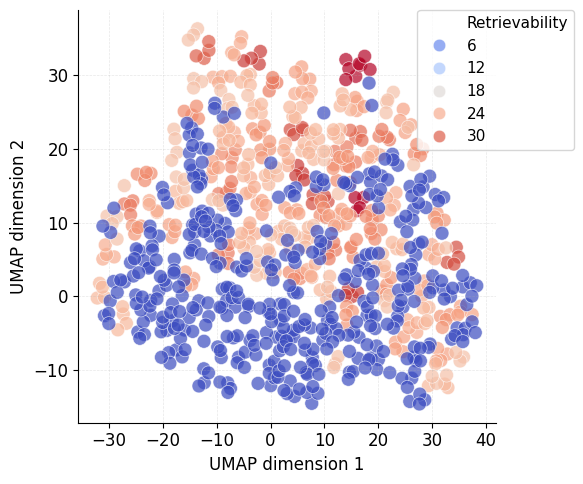

In [9]:
import seaborn as sns
from utils.analysis import create_signature_clusters
from config.metrics import SIGNATURE_COLUMNS

signature_columns = [col for col in SIGNATURE_COLUMNS if col in df.columns]
task = "NFCorpus"
model = "intfloat/e5-mistral-7b-instruct"

subset = df[(df["dataset"] == task) & 
            (df["model"] == model)]

if subset.shape[0] > 0:
    normalized_df = create_signature_clusters(subset, "score", 
                                        signature_columns, 
                                        method="umap", 
                                        annotate_idx=False,
                                        shape="score",
                                        method_kwargs={"random_state": 123, 
                                                        "n_components": 2, 
                                                        "n_neighbors": 100, 
                                                        'min_dist': 5,
                                                        "spread": 5
                                                        }, 
                                        normalize_axis="all", 
                                        normalize_method="max",
                                        use_pca=False,
                                        palette="coolwarm", #sns.color_palette(["#00E47C", "#08312A"], desat=0.7),
                                        legend_name="Retrievability",
                                        alpha=0.7,
                                        figsize=(6, 5),
                                        markers=["o"],
                                        save_name="figures/retrievability_clusterplot.pdf",
                                        bbox_to_anchor=(1, 1),
                                        legend_loc='upper center')

#### Raw embeddings

Loading embeddings for model:  cache_intfloat_e5-mistral-7b-instruct  and task:  NFCorpus
Looking for files at:  results/intfloat/e5-mistral-7b-instruct/intfloat__e5-mistral-7b-instruct
[('results/intfloat/e5-mistral-7b-instruct/intfloat__e5-mistral-7b-instruct', ['07163b72af1488142a360786df853f237b1a3ca1'], []), ('results/intfloat/e5-mistral-7b-instruct/intfloat__e5-mistral-7b-instruct/07163b72af1488142a360786df853f237b1a3ca1', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Building corpus hash map...


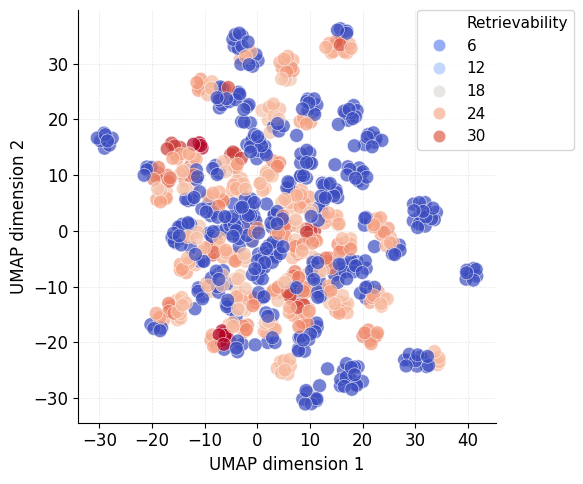

In [6]:
import umap
from utils.plotting import cluster_plot
from utils.general import process_embeddings, separate_query_vectors

cached_name = f"cache_{model.replace('/', '_')}"
data, results = load_embeddings(cached_name, task)
vectors = process_embeddings(data)
query_vectors, collection_vectors = separate_query_vectors(data, vectors, model, task)

vecs = np.vstack(subset["text"].apply(lambda x: np.array(data.get_vector(x))).values)

mapped_topology = umap.UMAP(
            **{"random_state": 123, 
                "n_components": 2, 
                "n_neighbors": 100, 
                'min_dist': 3,
                "spread": 3
                },
        ).fit_transform(vecs)


cluster_plot(color_feature="score",
                 embedding=mapped_topology,
                 metadata=subset,
                 method_name="umap",
                 annotate_points=False,
                 shape="score",
                 palette="coolwarm", #sns.color_palette(["#00E47C", "#08312A"], desat=0.7),
                 markerscale=1.5,
                 figsize=(6, 5),
                 legend_name="Retrievability",
                 save_name="figures/retrievability_clusterplot_raw.pdf",
                 alpha=0.7,
                 markers=["o"],
                 bbox_to_anchor=(1, 1),
                 legend_loc='upper center')

You can use annotate_idx to detect points of different clusters

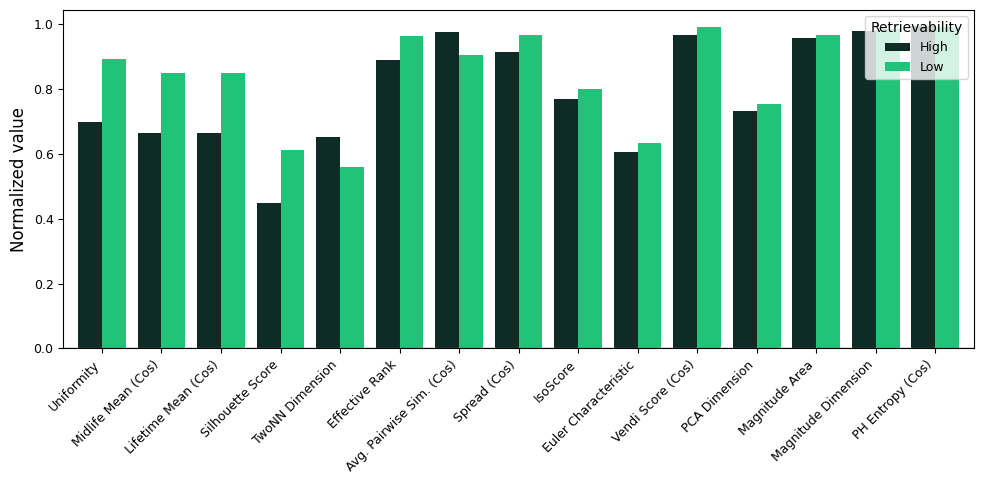

In [10]:
from utils.plotting import plot_cluster_differences
from config.metrics import NAME_MAPPING

bi_palette = sns.color_palette(["#08312A", 
                                "#00E47C", 
                                "#ffd03d",
                                "#6ad2e2",
                                "#ee6541",
                                "#928bde",
                                "#86251b",
                                "#076d7e",
                                "#e18600"], desat=0.7)
# Top
cluster_1_vals = [390, 7, 156, 57, 12]
# Bottom
cluster_2_vals = [447, 543, 722, 763, 603]

all_columns = SIGNATURE_COLUMNS + ["n_words"]
all_columns = [col for col in all_columns if col in normalized_df.columns]
cluster_1 = normalized_df.iloc[cluster_1_vals][all_columns].mean(axis=0)
cluster_2 = normalized_df.iloc[cluster_2_vals][all_columns].mean(axis=0)
cluster_df = plot_cluster_differences(cluster_1, cluster_2, name_mapping = NAME_MAPPING, 
                                      legend_name="Retrievability", save_name="figures/retrievability_clusterdifferences.png",
                                      cluster_1_name="High", cluster_2_name="Low",
                                      colors=bi_palette, alpha=1)

## Retrievability prediction with signatures

Here we train models across different folds to predict retrievability of documents based on the local topological signatures. We perform a binary classification and predict if the document ranks in the top 100 or the bottom 100. 

In [22]:
from utils.analysis import signature_predict_cv
from config.metrics import SIGNATURE_COLUMNS

signature_columns = [col for col in SIGNATURE_COLUMNS if col in df.columns]
signature_columns = signature_columns + [col+"_query" for col in signature_columns if col+"_query" in df.columns]

final_results = {}
for model in df["model"].unique():
    subset = df[(df["model"] == model) & (df["seed"] == 1234)]
    print(f"Model: {model} | Dataset size: ", subset.shape, " Distribution of types: ", subset['type'].value_counts(normalize=True). to_dict())
    preds, results = signature_predict_cv(subset, signature_columns, 'type', 
                                groups=subset['dataset'], hue="model", 
                                normalize_axis="dataset", normalize_method="max",
                                model_type="classification", use_pca=False, n_feats=10,
                                baselines=["twonn_dim", 
                                           "silhouette", 
                                           "mag_area",
                                           "pca_dim",
                                           "n_words",
                                           "avg_pair_sim_euclidean", 
                                           "vendi_score_euclidean", 
                                           "iso_score"], 
                                n_splits=3,
                                show_plot=False)
    
    # Compute accuracy per dataset
    pred_data = pd.DataFrame({"true": preds["true"],
             "group_labels": preds["group_labels"],
             "signatures": preds["signatures"]
             })
    pred_data["error"] = pred_data["true"] == pred_data["signatures"]
    per_dataset_accuracy = pred_data.groupby(["group_labels"]).error.mean()


    final_results[model] = {
                                "cv_acc": results["signature_balanced_accuracy"].values,
                                "cv_mcc": results["signature_mcc"].values,
                                "top_features": results["top_features"].to_dict(),
                                "group_accuracies": per_dataset_accuracy,
                                "all_data": results
                            }


Model: Alibaba-NLP/gte-Qwen2-1.5B-instruct | Dataset size:  (3600, 44)  Distribution of types:  {'High': 0.505, 'Low': 0.495}
Train Balanced Accuracy: 0.8837
Train Balanced Accuracy: 0.8272
Train Balanced Accuracy: 0.8353
Model: Alibaba-NLP/gte-Qwen2-7B-instruct | Dataset size:  (3600, 44)  Distribution of types:  {'High': 0.505, 'Low': 0.495}
Train Balanced Accuracy: 0.8999
Train Balanced Accuracy: 0.8585
Train Balanced Accuracy: 0.8691
Model: BAAI/bge-base-en-v1.5 | Dataset size:  (3600, 44)  Distribution of types:  {'High': 0.505, 'Low': 0.495}
Train Balanced Accuracy: 0.8545
Train Balanced Accuracy: 0.8969
Train Balanced Accuracy: 0.8598
Model: BAAI/bge-large-en-v1.5 | Dataset size:  (3600, 44)  Distribution of types:  {'High': 0.505, 'Low': 0.495}
Train Balanced Accuracy: 0.8447
Train Balanced Accuracy: 0.8781
Train Balanced Accuracy: 0.8335
Model: BAAI/bge-small-en-v1.5 | Dataset size:  (3600, 44)  Distribution of types:  {'High': 0.505, 'Low': 0.495}
Train Balanced Accuracy: 0.8

Are there any differences in performance between models? Which model is best to predict retrievability?

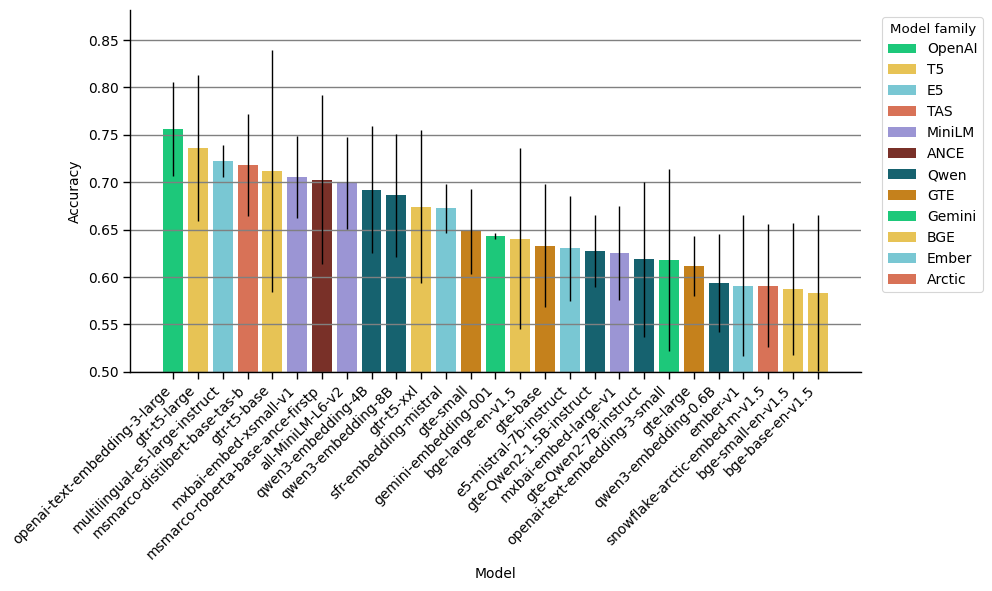

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bi_palette = sns.color_palette([
                            "#00E47C", 
                            "#ffd03d",
                            "#6ad2e2",
                            "#ee6541",
                            "#928bde",
                            "#86251b",
                            "#076d7e",
                            "#e18600"])

# Prepare accuracy results
acc_res = pd.DataFrame([
    {"model": model, "acc": res["cv_acc"]}
    for model, res in final_results.items()
])
acc_res["mean_acc"] = acc_res["acc"].apply(np.mean)
acc_res["std_acc"] = acc_res["acc"].apply(np.std)

# Merge with model details and sort
acc_res = (
    merge_with_model_details(acc_res, on="model", mdfile="config/model_details.yaml")
    .sort_values("mean_acc", ascending=False)
    .head(30)
).reset_index(drop=True)

# Set up plot
plt.figure(figsize=(10, 6))
sns.set_context('paper')

# Draw grid with lower zorder
plt.grid(axis='y', linestyle='-', color="grey", linewidth=1, zorder=1)

# Draw bars with higher zorder
order = acc_res["model_name_short"].tolist()
ax = sns.barplot(
    data=acc_res,
    x="model_name_short",
    y="mean_acc",
    hue="model_family",
    dodge=False,
    palette=bi_palette,
    edgecolor=None,
    alpha=1,
    zorder=1,
    order=order
)

# Reindex to match bar order
acc_res_ordered = acc_res.set_index("model_name_short").loc[order].reset_index()

# Add error bars with even higher zorder
for bar, (_, row) in zip(range(len(list(ax.patches))), acc_res_ordered.iterrows()):
    y = row["mean_acc"]
    err = row["std_acc"]
    plt.errorbar(x=bar, y=y, yerr=err, fmt='none', ecolor='black', linewidth=1, zorder=3)

# Remaining plot settings
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Model", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Model family", fontsize=10, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.ylim(0.5, None)
sns.despine()

# Save and show
plt.savefig("figures/retrieval_bias_accuracies.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

#### Feature importance analysis

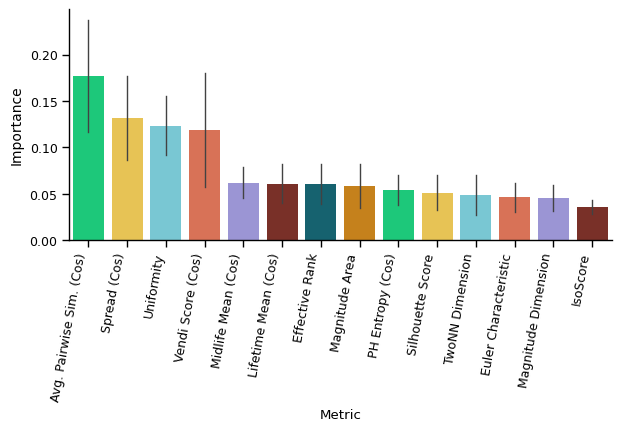

In [24]:
import matplotlib.pyplot as plt
from config.metrics import NAME_MAPPING

top_features_dfs = [pd.concat([pd.DataFrame(final_results[model]["top_features"][idx])  
                     for idx in final_results[model]["top_features"].keys()])
                     for model in final_results.keys()]

top_features = pd.concat(top_features_dfs).sort_values(by="Importance", ascending=False)
top_features["Metric"] = top_features["Feature"].map(NAME_MAPPING)

ordered_top_features = top_features[["Importance", "Metric"]].groupby("Metric").mean().reset_index().sort_values(by="Importance", ascending=False)
order = ordered_top_features["Metric"].tolist()

plt.figure(figsize=(7, 3))
sns.barplot(data=top_features, 
            x="Metric", 
            y="Importance", 
            errorbar="sd",
            dodge=False,         
            palette=bi_palette,      
            edgecolor=None,
            linewidth=0.7,
            errwidth=1,
            alpha=1,
            order=order)

sns.despine()
plt.xticks(rotation=80, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel("Importance", fontsize=10)
plt.savefig("figures/retrievability_importance.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

### Performance comparison

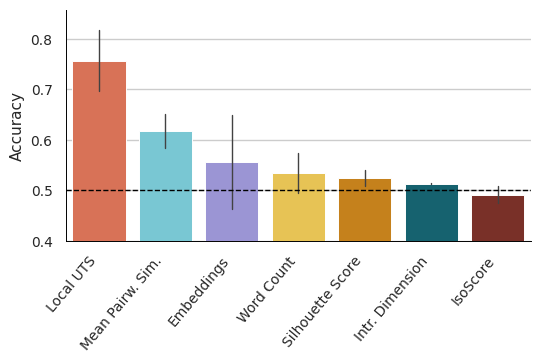

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
bi_palette = sns.color_palette([
                            "#ee6541",
                            "#6ad2e2",
                            "#928bde",
                            #"#00E47C", 
                            "#ffd03d",
                            #"#08312A",
                            "#e18600",
                            "#076d7e",           
                            "#86251b",          
                            ], desat=1)

# Only use Spearman
metric_name = "balanced_accuracy"
model = "apollo/openai-text-embedding-3-large"

results = final_results[model]["all_data"]
results_data = results.drop(["top_features"], axis=1)
results_data = results_data[[col for col in results_data if metric_name in col]]
results_melted = results_data.melt(value_vars=results_data.columns, var_name='Metric', value_name=metric_name)
# Add raw embeddings as additional baseline
raw_embeddings = pd.DataFrame().from_dict({
    "balanced_accuracy": raw_test_accuracies,
    "Metric": ["balanced_accuracy_embeddings"] * len(raw_test_accuracies),
})
results_melted = pd.concat([results_melted, raw_embeddings]).reset_index(drop=True)
results_melted[metric_name] = np.abs(results_melted[metric_name])
results_melted = results_melted.sort_values(by=metric_name, ascending=False)

name_mapping = {
    f"signature_{metric_name}": "Local UTS",
    f"avg_pair_sim_euclidean_{metric_name}": "Mean Pairw. Sim.",
    # f"vendi_score_euclidean_{metric_name}": "Vendi Score",
    f"iso_score_{metric_name}": "IsoScore",
    # f"embedding_dimension_{metric_name}": "Embedding Dimension",
    f"pca_dim_{metric_name}": "Intr. Dimension",
    # f"mag_area_{metric_name}": "Magnitude Area",
    #f"twonn_dim_{metric_name}": "TwoNN Dimension",
    f"n_words_{metric_name}": "Word Count",
    f"silhouette_{metric_name}": "Silhouette Score",
    "balanced_accuracy_embeddings": "Embeddings"
}

results_melted["Method"] = results_melted["Metric"].map(name_mapping)

# Sort by median
median_values = results_melted.groupby("Method")[metric_name].mean().sort_values(ascending=False)
results_melted["Method"] = pd.Categorical(results_melted["Method"], categories=median_values.index, ordered=True)
sns.set_theme(style="whitegrid")
sns.barplot(results_melted, 
            x="Method", 
            y=metric_name, 
            errorbar="sd",
            dodge=False,    
            color="#08312A",     
            palette=bi_palette,
            edgecolor=None,
            linewidth=0.7,
            errwidth=1,
            alpha=1)

plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(0.7)  
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(0.7) 

if metric_name == "balanced_accuracy":
    plt.ylim(0.4, None) 
    plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
    plt.ylabel("Accuracy", fontsize=11)
elif metric_name == "mcc":
    plt.ylabel("Matthews Correlation Coefficient", fontsize=8)
plt.xlabel("")
plt.xticks(rotation=50, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.savefig("figures/retrieval_comparison.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

### Embedding space visualization with queries

Loading embeddings for model:  cache_apollo_openai-text-embedding-3-large  and task:  ArguAna
Looking for files at:  results/apollo/openai-text-embedding-3-large/apollo__openai-text-embedding-3-large
[('results/apollo/openai-text-embedding-3-large/apollo__openai-text-embedding-3-large', ['no_revision_available'], []), ('results/apollo/openai-text-embedding-3-large/apollo__openai-text-embedding-3-large/no_revision_available', [], ['ArguAna.json', 'CQADupstackEnglishRetrieval.json', 'ClimateFEVER.json', 'FiQA2018.json', 'MSMARCO.json', 'NFCorpus.json', 'QuoraRetrieval.json', 'SCIDOCS.json', 'SciFact.json', 'TRECCOVID.json', 'Touche2020.json', 'model_meta.json'])]
Building corpus hash map...
Processed 1000 query vectors.
Input size:  (2206, 3072)


Text(0, 0.5, 'UMAP 2')

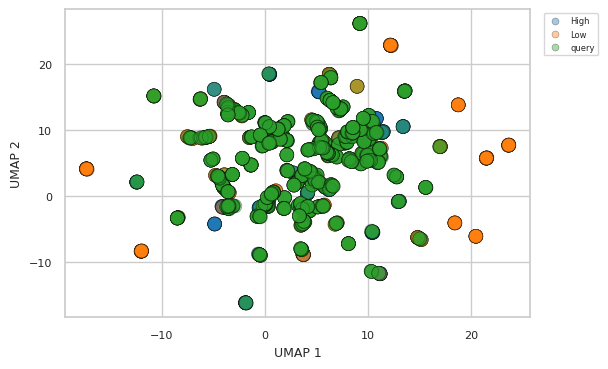

In [30]:
import seaborn as sns
import umap
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

from utils.general import load_embeddings, process_embeddings, separate_query_vectors


task = "ArguAna"
model = "apollo/openai-text-embedding-3-large"
cached_name = f"cache_{model.replace('/', '_')}"
subset = df[(df["model"] == model) & (df["dataset"] == task)].reset_index(drop=True)

# Get data
data, results = load_embeddings(cached_name, task)
vectors = process_embeddings(data)
query_vectors, collection_vectors = separate_query_vectors(data, vectors, model, task)

# Get neighborhood vectors
neighborhood_vectors = subset["text"].apply(lambda x: data.get_vector(x))
neighborhood_vectors = np.stack(neighborhood_vectors.values)
# Combine retrieved document vectors with query vectors
all_vectors = np.concatenate([neighborhood_vectors, query_vectors], axis=0)

# Prepare labels
vector_types = ["neighborhood"] * len(neighborhood_vectors) + ["query"] * len(query_vectors)
ranking_type = list(subset.type.values) + ["query"] * len(query_vectors)
retrieval_scores = list(subset.score.values) + [1.0] * len(query_vectors)
words_counts = list(subset.n_words.values) + [1] * len(query_vectors)

# Compute similarity to next query
similarity_matrix = cosine_similarity(neighborhood_vectors, query_vectors)
subset["closest_query_similarity"] = similarity_matrix.mean(axis=1)
query_similarity = list(subset["closest_query_similarity"].values) + [subset["closest_query_similarity"].values.min()] * len(query_vectors)

# Compute similarity to documents
similarity_matrix = cosine_similarity(neighborhood_vectors, collection_vectors)
subset["collection_similarity"] = similarity_matrix.mean(axis=1)

# Get documents with more than 1 retrievability
subset["above_1"] = subset["score"] > 1

# Add normalized retrieval scores
scaler = StandardScaler()
normalized_retrieval_scores = scaler.fit_transform(np.array(retrieval_scores).reshape(-1, 1)).flatten()
shifted_retrieval_scores = 10 * (normalized_retrieval_scores + abs(normalized_retrieval_scores.min()) + 1)
shifted_retrieval_scores = shifted_retrieval_scores 

# Apply UMAP
umap_model = umap.UMAP()
print("Input size: ", all_vectors.shape)
umap_results = umap_model.fit_transform(all_vectors)

# Create a DataFrame for plotting
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['vector_types'] = vector_types
umap_df['ranking_type'] = ranking_type
umap_df["retrieval_scores"] = np.array(query_similarity) * 100 

# Plot
plt.figure(figsize=(6, 4))

sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", 
                hue="ranking_type", linewidth=0.4, palette="tab10",
                edgecolor="black", alpha=0.4, s=100)
sns.scatterplot(data=umap_df[umap_df["ranking_type"] == "bottom"], x="UMAP1", y="UMAP2" , linewidth=0.4, palette="tab10",
                edgecolor="black", alpha=0.5, s=100)

plt.legend(bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           fontsize=6, 
           title="", 
           title_fontsize=8,
           markerscale=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("UMAP 1", fontsize=9)
plt.ylabel("UMAP 2", fontsize=9)

This is just a baseline check. Obvisouly the key metric to determine retrievability is the closeness to a query.

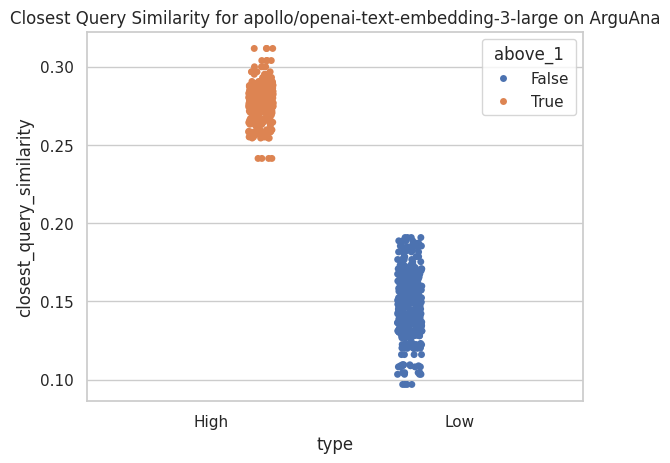

In [31]:
sns.stripplot(data=subset, x="type", y="closest_query_similarity", jitter=True, hue="above_1", dodge=True)
plt.title(f"Closest Query Similarity for {model} on {task}")
plt.show()

## Retrieval bias analysis

In [34]:
import pandas as pd
import numpy as np
from config.metrics import SIGNATURE_COLUMNS
from utils.general import aggregate_results, forward_fill_sample_size, merge_with_model_details, \
    add_transformed_columns

directory = "metric_results"
filename = "metrics_corpus"
filetype = ".csv"

# Load data
df = aggregate_results(directory, filename, filetype)
# # Default seed for first runs
df["seed"] = df["seed"].fillna(1234)
df["dataset"] = df["dataset"].str.replace("CQADupstackEnglishRetrieval", "DupstackEnglish")

# Get largest sample experiment
df = forward_fill_sample_size(df, group_cols=["model", "dataset", "seed"])
print(df.seed.value_counts())

# Fill nans
nan_vals = df[SIGNATURE_COLUMNS].isna().sum()
print("Nans: \n", nan_vals[nan_vals > 0])
df[SIGNATURE_COLUMNS] = df[SIGNATURE_COLUMNS].fillna(0)

# Merge with model details
df = merge_with_model_details(df, "config/model_details.yaml")
assert df.architecture.isna().sum() == 0

# Add transformed columns
cols_to_transform = ["mag_area", "twonn_dim", "ph_dim_euclidean", 
                     "main_score", "recall_at_20", "iso_score", 
                     "mag_dim", "recall_at_100", "recall_at_5"]
add_transformed_columns(df, cols_to_transform)

# Exclude certain experiments
print(df.shape)

Loaded dataframe with shape:  (9078, 63)
Forward filled sample sizes. New shape:  (882, 63)
seed
123.0     294
1234.0    294
2025.0    294
Name: count, dtype: int64
Nans: 
 iso_score    24
dtype: int64
(882, 95)


Queries metrics

In [38]:
import pandas as pd
import numpy as np
from utils.general import aggregate_results, forward_fill_sample_size, merge_with_model_details, \
    add_transformed_columns
%load_ext autoreload

directory = "metric_results"
filename = "metrics_queries"
filetype = ".csv"

# Load data
df_queries = aggregate_results(directory, filename, filetype, filter_str="_local")
# # Default seed for first runs
df_queries["seed"] = df_queries["seed"].fillna(1234)

# Get largest sample experiment
df_queries = forward_fill_sample_size(df_queries, group_cols=["model", "dataset", "seed"])
print(df_queries.seed.value_counts())

# Merge with model details
df_queries = merge_with_model_details(df_queries, "config/model_details.yaml")
assert df_queries.architecture.isna().sum() == 0
# Add transformed columns
cols_to_transform = ["mag_area", "twonn_dim", "ph_dim_euclidean", 
                     "main_score", "recall_at_20", "iso_score", 
                     "mag_dim", "recall_at_100", "recall_at_5"]
add_transformed_columns(df_queries, cols_to_transform)

# Exclude certain experiments
df_queries = df_queries.reset_index(drop=True)
print(df_queries.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded dataframe with shape:  (2559, 63)
Forward filled sample sizes. New shape:  (882, 63)
seed
123.0     294
1234.0    294
2025.0    294
Name: count, dtype: int64
(882, 95)


Merge

In [39]:
df = pd.merge(df, df_queries, on=["model", "dataset", "seed"], how="left", suffixes=("", "_q"))

### Retrieval bias per model

In [43]:
df['normalized_gini_at_100_dense'] = df.groupby('dataset')['gini_at_100_dense'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

This plot shows the retrieval bias across models and datasets. 

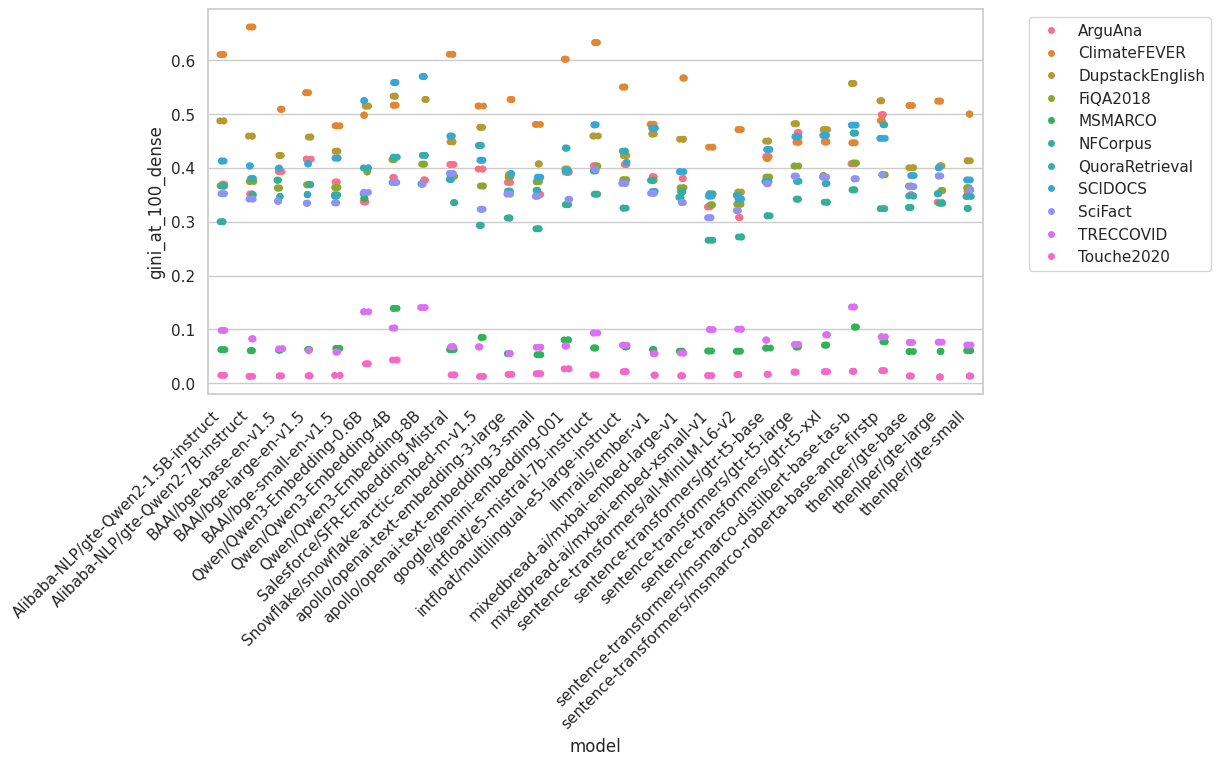

In [45]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x="model", y="gini_at_100_dense", hue="dataset")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

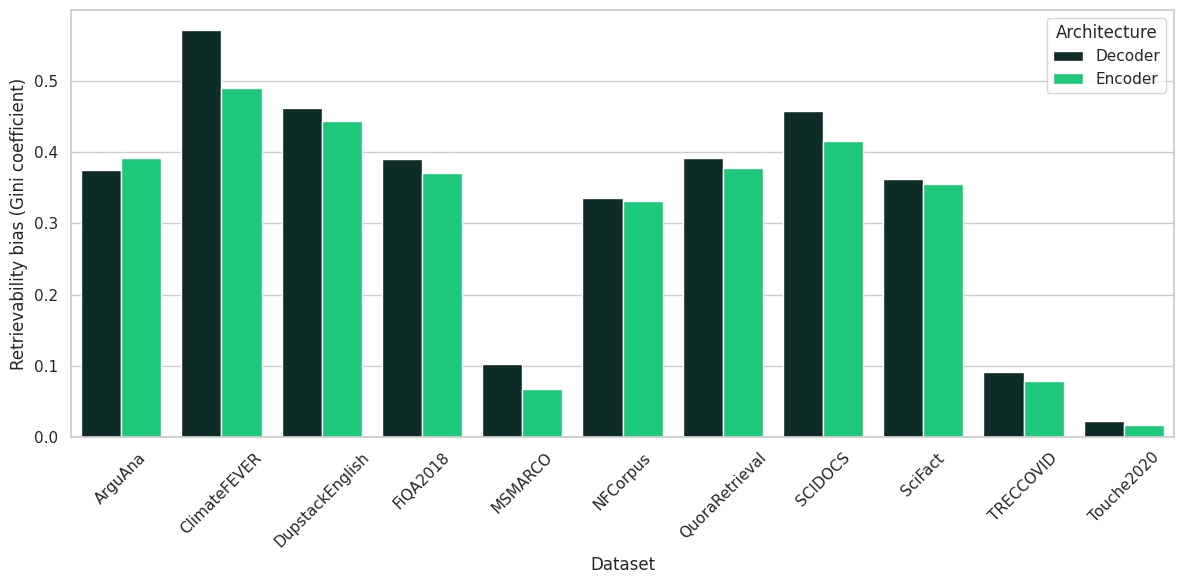

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
hue = "architecture"
data = df.copy()
mean_gini = data.groupby(['dataset', hue])['gini_at_100_dense'].mean().reset_index()


bi_palette = sns.color_palette([
                            "#ee6541",
                            "#6ad2e2",
                            "#928bde",
                            #"#00E47C", 
                            "#ffd03d",
                            #"#08312A",
                            "#e18600",
                            "#076d7e",           
                            "#86251b",          
                            ], desat=1)

plt.figure(figsize=(12, 6))
bi_palette = sns.color_palette(["#08312A", "#00E47C"], desat=1)
sns.barplot(data=mean_gini, x='dataset', y='gini_at_100_dense', hue=hue, ci=None, palette=bi_palette)
plt.xlabel('Dataset')
plt.ylabel('Retrievability bias (Gini coefficient)')
plt.xticks(rotation=45)
plt.legend(title='Architecture')
plt.tight_layout()
plt.savefig("retrievability_bias_gini.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
